In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
from subprocess import check_output
#train = pd.read_csv("train_20171226.csv")
#train.shape

# level_id处理.将'-'改为5

In [16]:
train['level_id'][train['level_id']=='-']=5

In [17]:
train.head()

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,displacement,if_charging,price_level,price,driven_type_id,fuel_type_id,newenergy_type_id,emission_standards_id,if_MPV_id,if_luxurious_id,power,cylinder_number,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track
0,201609,289403,94,12,2,1,1,1,6,MT,1.8,L,8-10W,9.5,1,1,1,1,2,1,98,4,170,4440,1833,1545,1695,1320,5,2700,1556,1562
1,201609,745137,435,637,3,2,1,2,6,DCT,1.6,L,10-15W,13.2,1,1,1,1,2,1,94,4,159,4534,1823,1483,1711,1336,5,2648,1553,1544
2,201609,714860,180,831,3,2,2,3,6,AT,1.8,L,10-15W,14.4,1,1,1,1,2,1,105,4,176,4720,1815,1465,1860,1459,5,2770,1579,1589
3,201609,175962,40,750,3,2,1,4,6,AT,1.6,L,10-15W,8.6,1,1,1,1,2,1,81,4,155,4475,1706,1469,1625,1145,5,2603,1460,1500
4,201609,270690,19,98,2,3,3,1,5,MT,1.5,L,5WL,-,2,1,1,1,1,1,82,4,146.5,4415,1685,1850,1825,1236,5,2720,1420,1440


In [18]:
train['level_id'][train['level_id']=='-']

Series([], Name: level_id, dtype: object)

# price为'-', 初步使用price_level的均值来填充

In [19]:
import re
temp_data = []
for data in train['price_level'][train['price']=='-']:
    temp_data.append(sum([int(i) for i in re.findall(r'\d+', data)]))
    
#train['new_price']=train['price']
j = 0
for i in range(train['price'].shape[0]):
    if train['price'][i] == '-':
        if temp_data[j] >= 10:
            train['price'][i] = temp_data[j]/2.0
        else:
            train['price'][i] = temp_data[j]
        j+=1

# engine_torque为'-', 使用power和engine_torque的比例来填充 

In [20]:
corr_mean=0.542385577562957
for i in range(train['class_id'].shape[0]):
    if train['engine_torque'][i]=='-':
        train['engine_torque'][i]=train['power'][i]/corr_mean

# TR,21个8;7  21个5;4     移除对应数据;因为时间为12年,之后不在出现

In [21]:
train['TR'][train['TR']=='8;7']=8

In [22]:
train['TR'][train['TR']=='5;4']=5

# fuel_type_id中3个'-',175962为2个;961962为1个.175962均为1号燃料,961962均为1号燃料.缺失值统一修改为1

In [23]:
train['fuel_type_id'][train['fuel_type_id']=='-']=1

# power为81/70  engine_torque为155/140

In [24]:
train['power'][train['power']=='81/70']=81

In [25]:
train['engine_torque'][train['engine_torque']=='155/140']=155

# rated_passenger  
5-7,5-8为1601-1603总销量11,用7,8替换.
4-5为1601-1608总销量16,5替换.
9为1606,1608销量2,8替换
7-8由8来替换,,6-7,6-8由6替换

In [32]:
train[['rated_passenger', 'class_id']].groupby(['rated_passenger'],as_index=False).count()

,rated_passenger,class_id
0,4,19
1,5,18254
2,6,336
3,7,658
4,8,890


In [27]:
train['rated_passenger'][train['rated_passenger']=='4月5日']=5
train['rated_passenger'][train['rated_passenger']=='5月7日']=7
train['rated_passenger'][train['rated_passenger']=='5月8日']=8
train['rated_passenger'][train['rated_passenger']=='9']=8
train['rated_passenger'][train['rated_passenger']=='6月7日']=6
train['rated_passenger'][train['rated_passenger']=='6月8日']=6
train['rated_passenger'][train['rated_passenger']=='7月8日']=8

In [31]:
#转换类型
train['TR']=train['TR'].astype(int)
train['price']=train['price'].astype(float)
train['fuel_type_id']=train['fuel_type_id'].astype(int)
train['power']=train['power'].astype(float)
train['engine_torque']=train['engine_torque'].astype(float)
train['rated_passenger']=train['rated_passenger'].astype(int)

# level_id  gearbox_type  if_charging  price_level转为数值型

In [34]:
train[['price_level', 'class_id']].groupby(['price_level'], as_index=False).count()

,price_level,class_id
0,10-15W,7471
1,15-20W,3928
2,20-25W,1659
3,25-35W,1317
4,35-50W,1700
5,5-8W,1510
6,50-75W,303
7,5WL,637
8,8-10W,1632


In [35]:
train[['level_id', 'class_id']].groupby(['level_id'], as_index=False).count()

,level_id,class_id
0,5,298
1,1,10619
2,2,4765
3,3,3523
4,4,933
5,5,19


In [36]:
train[['gearbox_type', 'class_id']].groupby(['gearbox_type'], as_index=False).count()

,gearbox_type,class_id
0,AMT,54
1,AT,8421
2,AT;DCT,21
3,CVT,2415
4,DCT,2653
5,MT,6572
6,MT;AT,21


In [37]:
train[['if_charging', 'class_id']].groupby(['if_charging'], as_index=False).count()

,if_charging,class_id
0,L,13121
1,T,7036


In [38]:
train[['gearbox_type', 'sale_quantity']].groupby(['gearbox_type'], as_index=False ).sum()

,gearbox_type,sale_quantity
0,AMT,8183
1,AT,1249166
2,AT;DCT,2550
3,CVT,217578
4,DCT,307555
5,MT,760350
6,MT;AT,690


In [39]:
title_mapping = {"AMT": 1, "CVT": 2, "DCT": 3, "MT": 4, "AT": 5}
train['gearbox_type'] = train['gearbox_type'].map(title_mapping)

In [40]:
train['if_charging'] = train['if_charging'].replace('L', 1)
train['if_charging'] = train['if_charging'].replace('T', 2)

In [41]:
train[['if_charging', 'sale_quantity']].groupby(['if_charging'], as_index=False ).sum()

,if_charging,sale_quantity
0,1,1902041
1,2,644031


In [42]:
train[['price_level', 'sale_quantity']].groupby(['price_level'], as_index=False ).sum().sort_values(by='sale_quantity', ascending=False)

,price_level,sale_quantity
0,10-15W,1158367
1,15-20W,444910
5,5-8W,192779
2,20-25W,179928
8,8-10W,156487
7,5WL,138105
3,25-35W,125177
4,35-50W,117719
6,50-75W,32600


In [44]:
title_mapping = {"5WL": 1, "5-8W": 2, "8-10W": 3, "10-15W": 4, "15-20W": 5, "20-25W": 6, "25-35W": 7, "35-50W": 8, "50-75W": 9,}
train['price_level'] = train['price_level'].map(title_mapping)

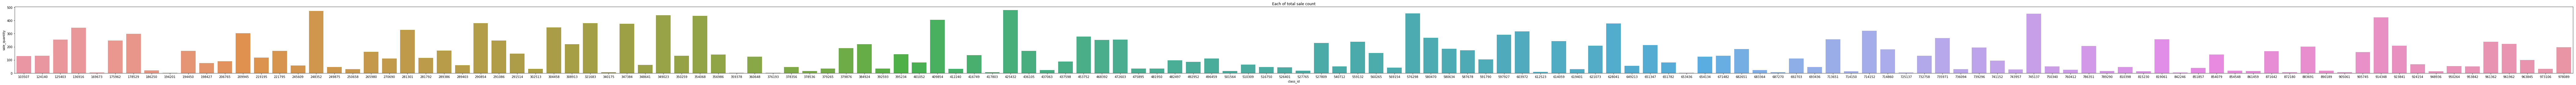

In [45]:
fig, (axis) = plt.subplots(1,figsize=(150,4))
axis.set_title('Each of total sale count')
sale_count = train[['class_id','sale_quantity']].groupby(['class_id'],as_index=False).count()
sns.barplot(x='class_id', y='sale_quantity',data=sale_count)

# 添加新的特征月份 sale_mounth

In [53]:
train['sale_month']=train['sale_date']

In [54]:
train['sale_mounth'].count()

20157

# 更新df_train的索引

In [55]:
df_train = train
df_train.head()

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,displacement,if_charging,price_level,price,driven_type_id,fuel_type_id,newenergy_type_id,emission_standards_id,if_MPV_id,if_luxurious_id,power,cylinder_number,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track,sale_mounth,sale_month
0,201609,289403,94,12,2,1,1,1,6,4.0,1.8,1,3,9.5,1,1,1,1,2,1,98.0,4,170.0,4440,1833,1545,1695,1320,5,2700,1556,1562,9,201609
1,201609,745137,435,637,3,2,1,2,6,3.0,1.6,1,4,13.2,1,1,1,1,2,1,94.0,4,159.0,4534,1823,1483,1711,1336,5,2648,1553,1544,9,201609
2,201609,714860,180,831,3,2,2,3,6,5.0,1.8,1,4,14.4,1,1,1,1,2,1,105.0,4,176.0,4720,1815,1465,1860,1459,5,2770,1579,1589,9,201609
3,201609,175962,40,750,3,2,1,4,6,5.0,1.6,1,4,8.6,1,1,1,1,2,1,81.0,4,155.0,4475,1706,1469,1625,1145,5,2603,1460,1500,9,201609
4,201609,270690,19,98,2,3,3,1,5,4.0,1.5,1,1,5.0,2,1,1,1,1,1,82.0,4,146.5,4415,1685,1850,1825,1236,5,2720,1420,1440,9,201609


In [56]:
for i in range(df_train['class_id'].count()):
    df_train['sale_month'][i] =df_train['sale_date'][i]%100 

In [59]:
df_train = df_train.drop(['sale_mounth'], axis=1)

In [60]:
#保存当前修改,添加特征sale_month
df_train.to_csv('0115_df_train.csv', index=False)

In [62]:
df_train.head()

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,displacement,if_charging,price_level,price,driven_type_id,fuel_type_id,newenergy_type_id,emission_standards_id,if_MPV_id,if_luxurious_id,power,cylinder_number,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track,sale_month
0,201609,289403,94,12,2,1,1,1,6,4.0,1.8,1,3,9.5,1,1,1,1,2,1,98.0,4,170.0,4440,1833,1545,1695,1320,5,2700,1556,1562,9
1,201609,745137,435,637,3,2,1,2,6,3.0,1.6,1,4,13.2,1,1,1,1,2,1,94.0,4,159.0,4534,1823,1483,1711,1336,5,2648,1553,1544,9
2,201609,714860,180,831,3,2,2,3,6,5.0,1.8,1,4,14.4,1,1,1,1,2,1,105.0,4,176.0,4720,1815,1465,1860,1459,5,2770,1579,1589,9
3,201609,175962,40,750,3,2,1,4,6,5.0,1.6,1,4,8.6,1,1,1,1,2,1,81.0,4,155.0,4475,1706,1469,1625,1145,5,2603,1460,1500,9
4,201609,270690,19,98,2,3,3,1,5,4.0,1.5,1,1,5.0,2,1,1,1,1,1,82.0,4,146.5,4415,1685,1850,1825,1236,5,2720,1420,1440,9


# brand_id 与销量的关系

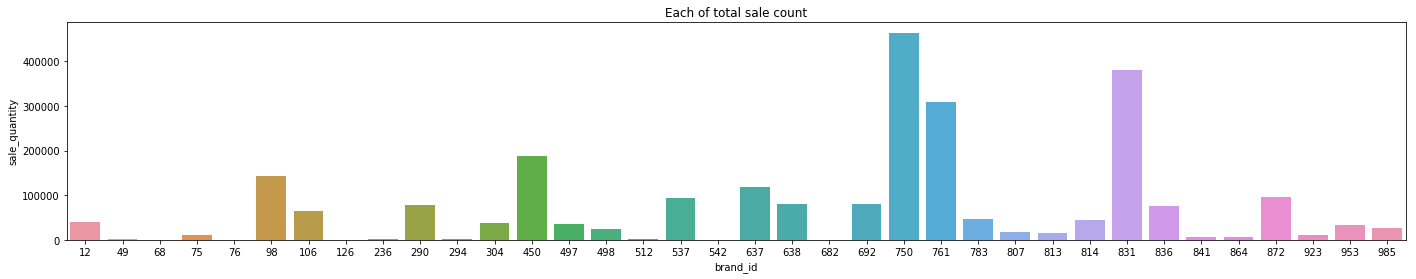

In [63]:
fig, (axis) = plt.subplots(1,figsize=(24,4))
axis.set_title('Each of total sale count')
sale_count = train[['brand_id','sale_quantity']].groupby(['brand_id'],as_index=False).sum()
sns.barplot(x='brand_id', y='sale_quantity',data=sale_count)

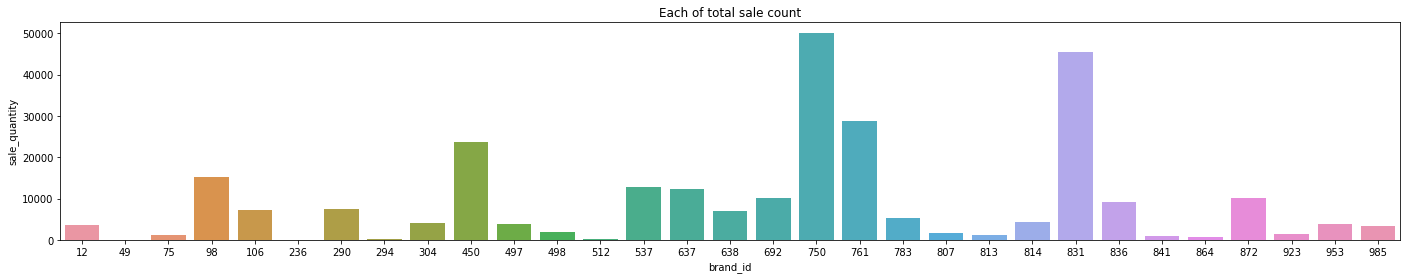

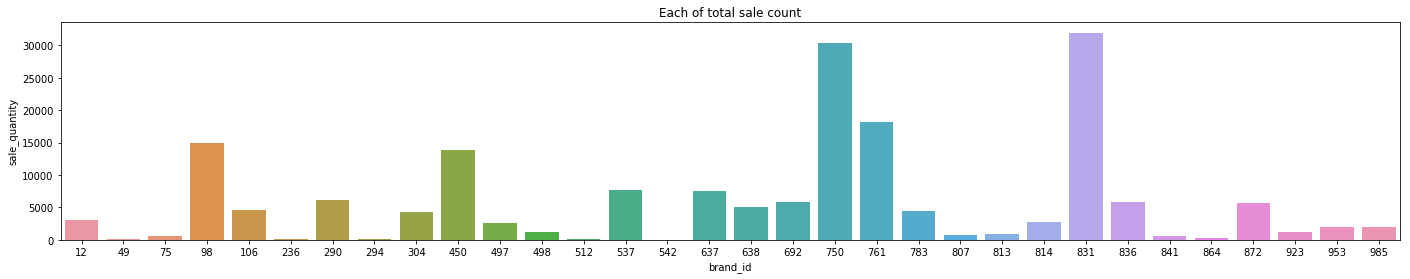

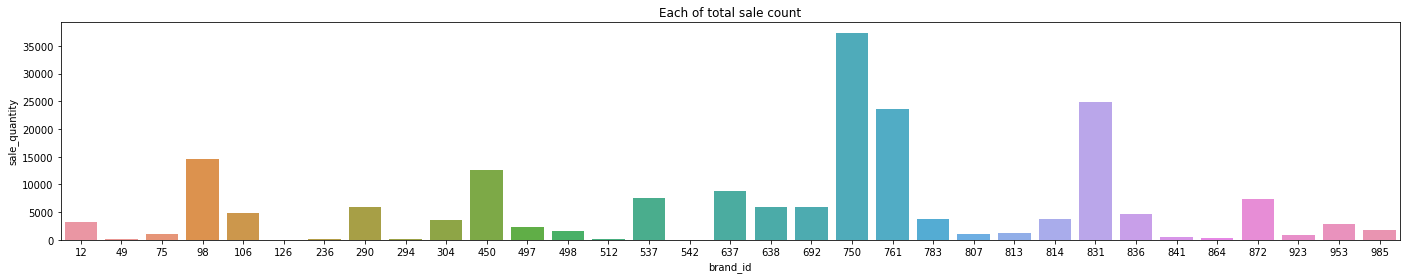

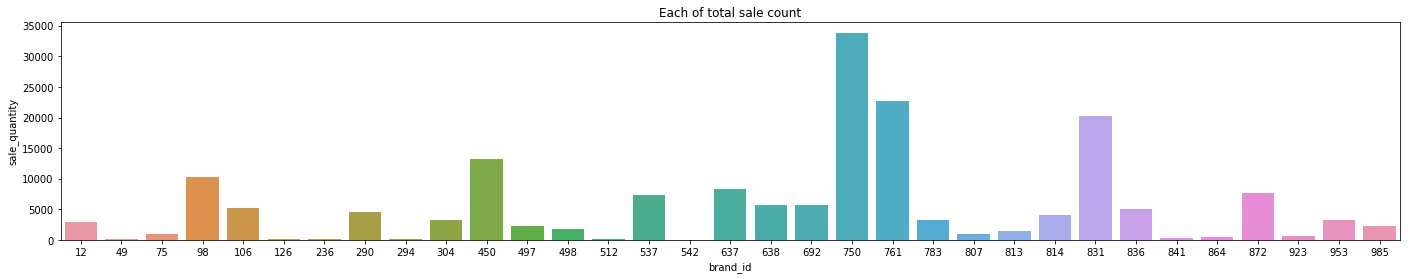

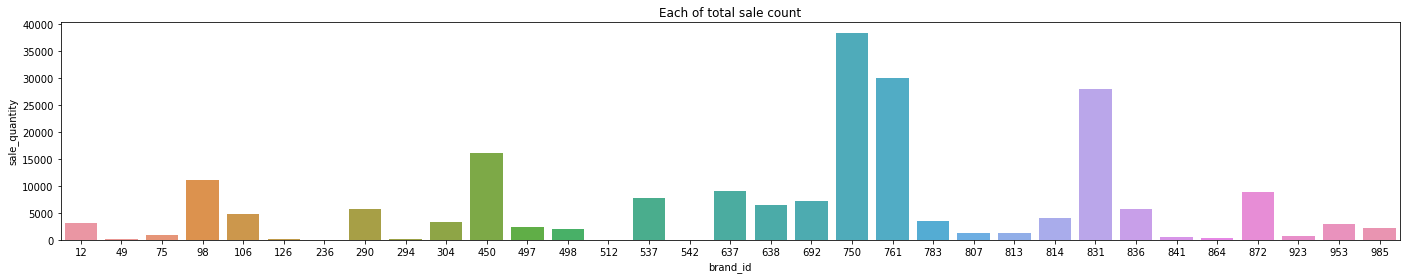

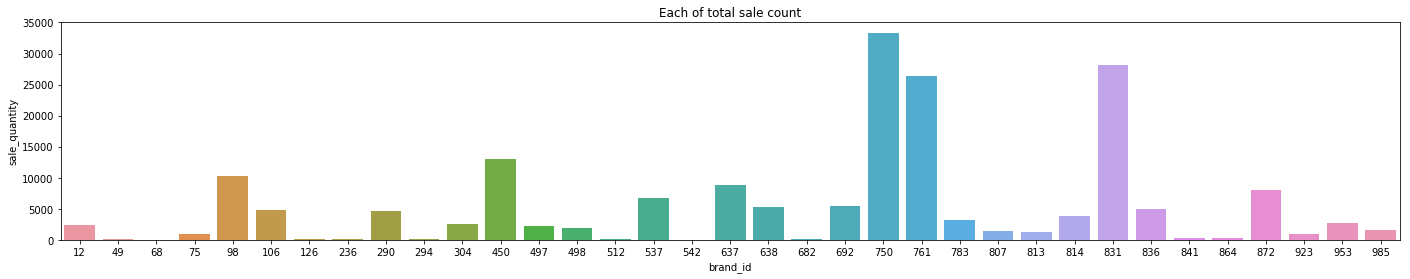

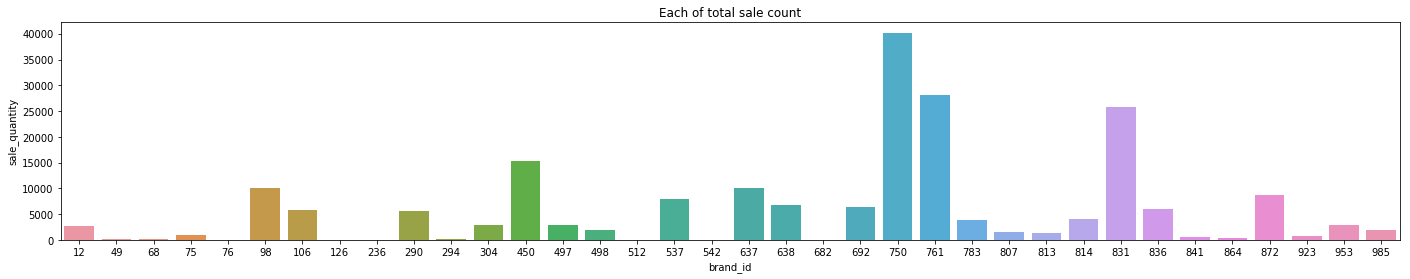

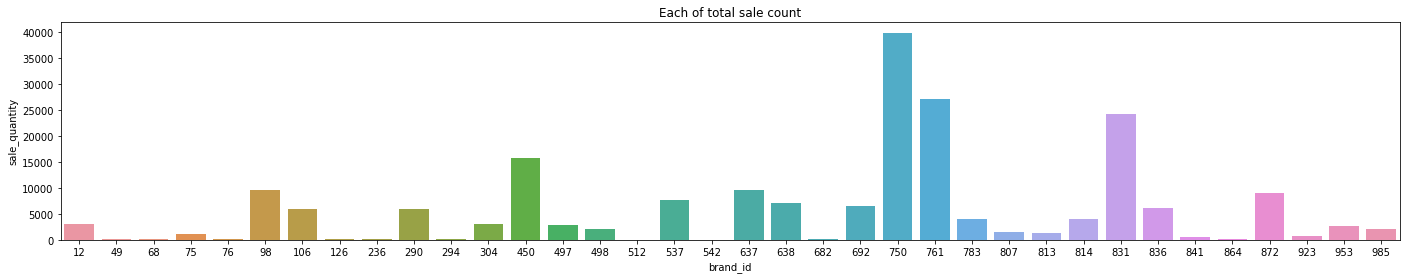

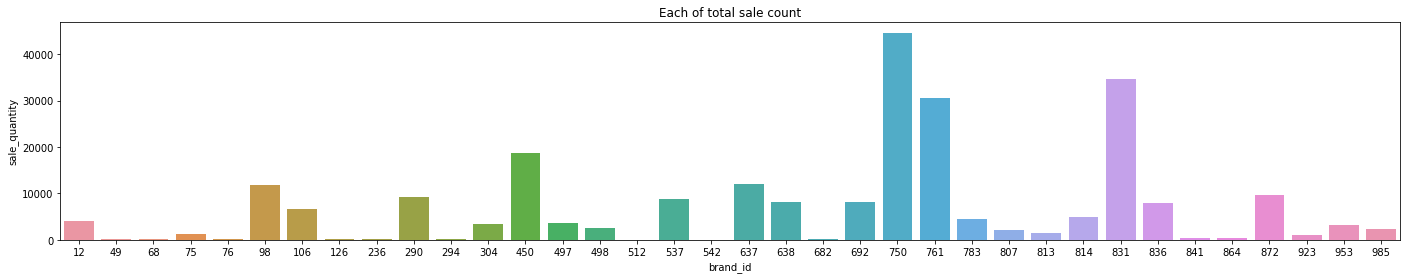

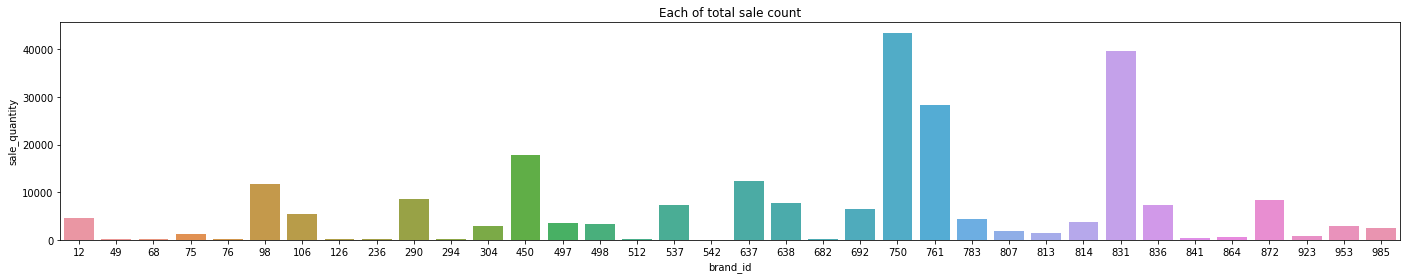

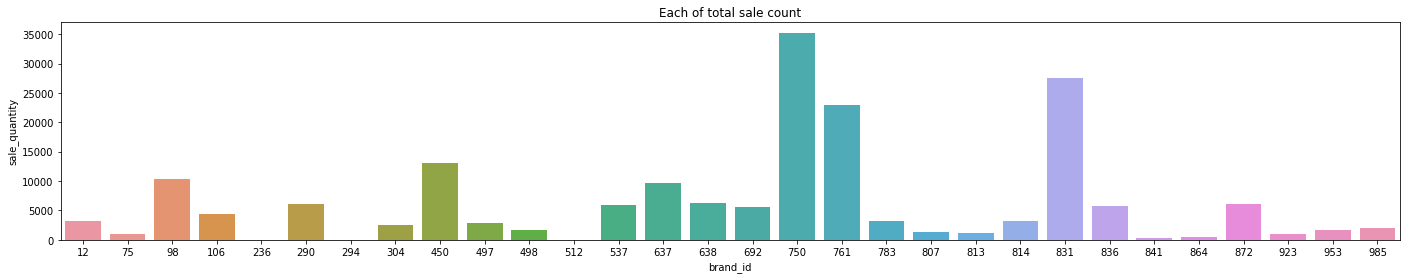

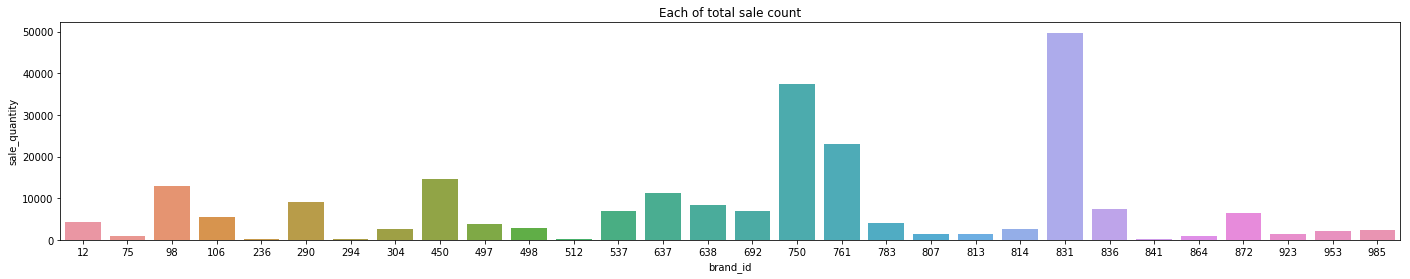

In [67]:
#各品牌在2012-2017年间,11月份的销量
for i in range(12):
    fig, (axis) = plt.subplots(1,figsize=(24,4))
    axis.set_title('Each of total sale count')
    sale_count = train[['brand_id','sale_quantity']][train['sale_month']==(i+1)].groupby(['brand_id'],as_index=False).sum()
    sns.barplot(x='brand_id', y='sale_quantity',data=sale_count)

In [208]:
for id in range(140):
    print(df_train[['fuel_type_id', 'sale_quantity']][df_train['class_id']==df_train['class_id'][id]].groupby(['fuel_type_id'], as_index=False).sum())

   fuel_type_id  sale_quantity
0             1           3865
   fuel_type_id  sale_quantity
0             1          53411
   fuel_type_id  sale_quantity
0             1          17076
   fuel_type_id  sale_quantity
0             1          20644
   fuel_type_id  sale_quantity
0             1          32539
   fuel_type_id  sale_quantity
0             1          19267
1             2              9
   fuel_type_id  sale_quantity
0             1          15077
   fuel_type_id  sale_quantity
0             1          20605
   fuel_type_id  sale_quantity
0             1           8315
   fuel_type_id  sale_quantity
0             1           3381
1             2             20
   fuel_type_id  sale_quantity
0             1          24894
1             2           1628
   fuel_type_id  sale_quantity
0             1         136219
   fuel_type_id  sale_quantity
0             1          11888
   fuel_type_id  sale_quantity
0             1           3268
   fuel_type_id  sale_quantity
0       

In [247]:
for id in range(100):
    print(df_train[['sale_date', 'sale_quantity']][df_train['class_id']==df_train['class_id'][id]].groupby(['sale_date'], as_index=False).sum())

    sale_date  sale_quantity
0      201605              9
1      201606              9
2      201607             18
3      201608            120
4      201609            222
5      201610            298
6      201611            204
7      201612            171
8      201701            400
9      201702            231
10     201703            359
11     201704            213
12     201705            222
13     201706            179
14     201707            375
15     201708            264
16     201709            299
17     201710            272
    sale_date  sale_quantity
0      201205              8
1      201206            214
2      201207            352
3      201208            377
4      201209            476
5      201210            689
6      201211            591
7      201212            631
8      201301            714
9      201302            335
10     201303            476
11     201304            655
12     201305            623
13     201306            582
14     201307 

    sale_date  sale_quantity
0      201411            117
1      201412            262
2      201501            592
3      201502            457
4      201503            253
5      201504            378
6      201505            283
7      201506            310
8      201507            456
9      201508            244
10     201509            311
11     201510            301
12     201511            398
13     201512            427
14     201601            863
15     201602            496
16     201603            437
17     201604            408
18     201605            446
19     201606            370
20     201607            417
21     201608            475
22     201609            339
23     201610            447
24     201611            388
25     201612            593
26     201701            388
27     201702            359
28     201703            359
29     201704            300
30     201705            291
31     201706            379
32     201707            340
33     201708 

    sale_date  sale_quantity
0      201202             26
1      201203             64
2      201204             83
3      201205            122
4      201206             51
5      201207            237
6      201208            269
7      201209            211
8      201210            250
9      201211            244
10     201212            198
11     201301            825
12     201302            563
13     201303            404
14     201304            236
15     201305            288
16     201306            230
17     201307            243
18     201308            307
19     201309            160
20     201310            262
21     201311            256
22     201312            288
23     201401            928
24     201402            570
25     201403            384
26     201404            211
27     201405            211
28     201406            224
29     201407            237
..        ...            ...
39     201505            237
40     201506            276
41     201507 

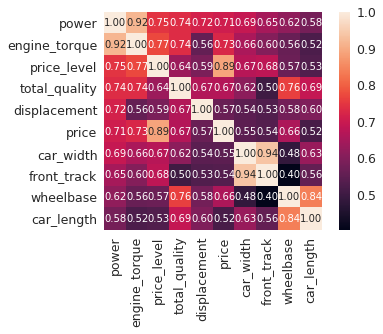

In [146]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'power')['power'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

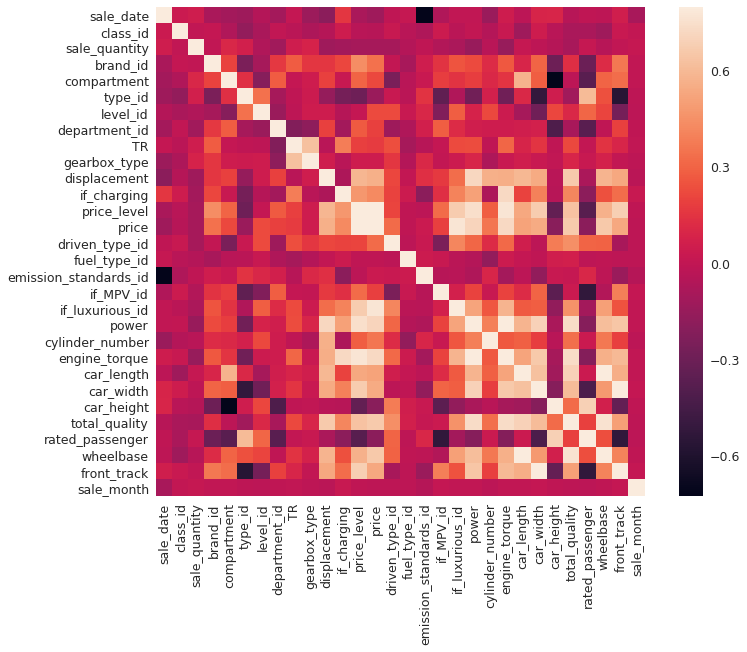

In [141]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

# 删除相同表达的特征,newenergy_type_id,rear_track,equipment_quality

In [114]:
df_train = df_train.drop(['newenergy_type_id', 'rear_track'], axis=1)

In [121]:
df_train = df_train.drop(['equipment_quality'], axis=1)

# 对测试集添加特征

In [235]:
temp = df_train[['class_id', 'sale_quantity']][df_train['fuel_type_id']==2].groupby(['class_id'], as_index=False).count()
temp = temp['class_id'][temp['sale_quantity']>=6].tolist()
temp

[136916, 304458, 384924, 468392, 591790, 597927]

In [236]:
temp1 = df_train[['class_id', 'sale_quantity']][df_train['fuel_type_id']==3].groupby(['class_id'], as_index=False).count()
temp1 = temp1['class_id'][temp1['sale_quantity']>=6].tolist()
temp1

[409854, 576298, 603972]

In [218]:
df_test = pd.read_csv("testA_20171225.csv")

In [221]:
df_test = df_test.drop(['predict_quantity'], axis=1)

# 测试集添加fuel_type_id,1:无新能源  2:2号新能源  3:3号新能源
# 对训练集也做同样修改

In [222]:
df_test['fuel_type_id'] = 1

In [223]:
df_test.head()

,predict_date,class_id,fuel_type_id
0,201711,103507,1
1,201711,124140,1
2,201711,125403,1
3,201711,136916,1
4,201711,169673,1


In [239]:
for id in temp:
    df_test['fuel_type_id'][df_test['class_id']==id] = 2
for id in temp1:
    df_test['fuel_type_id'][df_test['class_id']==id] = 3

In [241]:
df_train['fuel_type_id'] = 1

In [242]:
for id in temp:
    df_train['fuel_type_id'][df_train['class_id']==id] = 2
for id in temp1:
    df_train['fuel_type_id'][df_train['class_id']==id] = 3

# df_test添加class_id固定配置特征
# brand_id  type_id level_id  department_id  if_MPV_id  if_luxurious_id

In [255]:
brand = df_train[['brand_id', 'sale_quantity']].groupby(['brand_id'], as_index=False).count()
brand = brand['brand_id'].tolist()

In [263]:
brand_map = {}
for br in brand:
    brand_map[br] = list(set(df_train['class_id'][df_train['brand_id']==br].tolist()))

In [270]:
class_brand = {}
for k,v in brand_map.items():
    for value in v:
        class_brand[value]=k

In [273]:
df_test['brand_id'] = 1
for i in range(df_test['class_id'].count()):
    df_test['brand_id'][i] = class_brand[df_test['class_id'][i]]

In [279]:
#type_id
type_li = df_train[['type_id', 'sale_quantity']].groupby(['type_id'], as_index=False).count()
type_li = type_li['type_id'].tolist()

type_map = {}
for ty in type_li:
    type_map[ty] = list(set(df_train['class_id'][df_train['type_id']==ty].tolist()))
    
class_type = {}
for k,v in type_map.items():
    for value in v:
        class_type[value]=k

df_test['type_id'] = 1
for i in range(df_test['class_id'].count()):
    df_test['type_id'][i] = class_type[df_test['class_id'][i]]

In [282]:
#level_id
level = df_train[['level_id', 'sale_quantity']].groupby(['level_id'], as_index=False).count()
level = level['level_id'].tolist()

level_map = {}
for le in level:
    level_map[le] = list(set(df_train['class_id'][df_train['type_id']==le].tolist()))
    
class_level = {}
for k,v in level_map.items():
    for value in v:
        class_level[value]=k

df_test['level_id'] = 1
for i in range(df_test['class_id'].count()):
    df_test['level_id'][i] = class_level[df_test['class_id'][i]]

In [300]:
#department_id
department = df_train[['department_id', 'sale_quantity']].groupby(['department_id'], as_index=False).count()
department = department['department_id'].tolist()

department_map = {}
for le in department:
    department_map[le] = list(set(df_train['class_id'][df_train['department_id']==le].tolist()))
    
class_department = {}
for k,v in department_map.items():
    for value in v:
        class_department[value]=k

df_test['department_id'] = 1
for i in range(df_test['class_id'].count()):
    df_test['department_id'][i] = class_department[df_test['class_id'][i]]

In [302]:
#if_MPV_id
department = df_train[['if_MPV_id', 'sale_quantity']].groupby(['if_MPV_id'], as_index=False).count()
department = department['if_MPV_id'].tolist()

department_map = {}
for le in department:
    department_map[le] = list(set(df_train['class_id'][df_train['if_MPV_id']==le].tolist()))
    
class_department = {}
for k,v in department_map.items():
    for value in v:
        class_department[value]=k

df_test['if_MPV_id'] = 1
for i in range(df_test['class_id'].count()):
    df_test['if_MPV_id'][i] = class_department[df_test['class_id'][i]]

In [305]:
#if_luxurious_id
department = df_train[['if_luxurious_id', 'sale_quantity']].groupby(['if_luxurious_id'], as_index=False).count()
department = department['if_luxurious_id'].tolist()

department_map = {}
for le in department:
    department_map[le] = list(set(df_train['class_id'][df_train['if_luxurious_id']==le].tolist()))
    
class_department = {}
for k,v in department_map.items():
    for value in v:
        class_department[value]=k

df_test['if_luxurious_id'] = 1
for i in range(df_test['class_id'].count()):
    df_test['if_luxurious_id'][i] = class_department[df_test['class_id'][i]]

# 添加年,月特征

In [311]:
df_test['sale_year'] = 17
df_test['sale_month'] = 11

In [318]:
df_train['sale_year'] = df_train['sale_date']//100%100

# 多类别变量,此处初步采用配置多的一项作为测试集配置

In [334]:
df_train[['sale_year', 'sale_quantity']][df_train['if_charging']==1][df_train['class_id']==df_train['class_id'][2]].groupby(['sale_year'], as_index=False).sum()

/home/betten/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,sale_year,sale_quantity
0,14,1641
1,15,8175
2,16,4045
3,17,1722


In [6]:
class_list = list(set(df_train['class_id'].tolist()))

In [371]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['if_charging', 'sale_quantity']][df_train['class_id']==id].groupby(['if_charging'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['if_charging'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['if_charging'] = 1
for i in range(df_test['class_id'].count()):
    df_test['if_charging'][i] = charging_map[df_test['class_id'][i]]

In [391]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['compartment', 'sale_quantity']][df_train['class_id']==id].groupby(['compartment'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['compartment'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['compartment'] = 1
for i in range(df_test['class_id'].count()):
    df_test['compartment'][i] = charging_map[df_test['class_id'][i]]

In [396]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['TR', 'sale_quantity']][df_train['class_id']==id].groupby(['TR'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['TR'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['TR'] = 1
for i in range(df_test['class_id'].count()):
    df_test['TR'][i] = charging_map[df_test['class_id'][i]]

In [399]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['gearbox_type', 'sale_quantity']][df_train['class_id']==id].groupby(['gearbox_type'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['gearbox_type'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['gearbox_type'] = 1
for i in range(df_test['class_id'].count()):
    df_test['gearbox_type'][i] = charging_map[df_test['class_id'][i]]

In [402]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['price_level', 'sale_quantity']][df_train['class_id']==id].groupby(['price_level'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['price_level'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['price_level'] = 1
for i in range(df_test['class_id'].count()):
    df_test['price_level'][i] = charging_map[df_test['class_id'][i]]

In [404]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['driven_type_id', 'sale_quantity']][df_train['class_id']==id].groupby(['driven_type_id'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['driven_type_id'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['driven_type_id'] = 1
for i in range(df_test['class_id'].count()):
    df_test['driven_type_id'][i] = charging_map[df_test['class_id'][i]]

In [406]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['emission_standards_id', 'sale_quantity']][df_train['class_id']==id].groupby(['emission_standards_id'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['emission_standards_id'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['emission_standards_id'] = 1
for i in range(df_test['class_id'].count()):
    df_test['emission_standards_id'][i] = charging_map[df_test['class_id'][i]]

In [407]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['cylinder_number', 'sale_quantity']][df_train['class_id']==id].groupby(['cylinder_number'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['cylinder_number'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['cylinder_number'] = 1
for i in range(df_test['class_id'].count()):
    df_test['cylinder_number'][i] = charging_map[df_test['class_id'][i]]

In [410]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['rated_passenger', 'sale_quantity']][df_train['class_id']==id].groupby(['rated_passenger'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['rated_passenger'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p
    
#给测试集添加配置属性
df_test['rated_passenger'] = 1
for i in range(df_test['class_id'].count()):
    df_test['rated_passenger'][i] = charging_map[df_test['class_id'][i]]

In [414]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['wheelbase', 'sale_quantity']][df_train['class_id']==id].groupby(['wheelbase'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['wheelbase'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['wheelbase'] = 1
for i in range(df_test['class_id'].count()):
    df_test['wheelbase'][i] = charging_map[df_test['class_id'][i]]

# 单值变量 price  power length width height total_quanlity front_track engine_torque

In [428]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['price', 'sale_quantity']][df_train['class_id']==id].groupby(['price'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['price'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['price'] = 1
for i in range(df_test['class_id'].count()):
    df_test['price'][i] = charging_map[df_test['class_id'][i]]

In [431]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['power', 'sale_quantity']][df_train['class_id']==id].groupby(['power'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['power'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['power'] = 1
for i in range(df_test['class_id'].count()):
    df_test['power'][i] = charging_map[df_test['class_id'][i]]

In [433]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['car_length', 'sale_quantity']][df_train['class_id']==id].groupby(['car_length'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['car_length'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['car_length'] = 1
for i in range(df_test['class_id'].count()):
    df_test['car_length'][i] = charging_map[df_test['class_id'][i]]

In [435]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['car_width', 'sale_quantity']][df_train['class_id']==id].groupby(['car_width'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['car_width'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['car_width'] = 1
for i in range(df_test['class_id'].count()):
    df_test['car_width'][i] = charging_map[df_test['class_id'][i]]

In [437]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['car_height', 'sale_quantity']][df_train['class_id']==id].groupby(['car_height'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['car_height'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['car_height'] = 1
for i in range(df_test['class_id'].count()):
    df_test['car_height'][i] = charging_map[df_test['class_id'][i]]

In [439]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['total_quality', 'sale_quantity']][df_train['class_id']==id].groupby(['total_quality'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['total_quality'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['total_quality'] = 1
for i in range(df_test['class_id'].count()):
    df_test['total_quality'][i] = charging_map[df_test['class_id'][i]]

In [441]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['front_track', 'sale_quantity']][df_train['class_id']==id].groupby(['front_track'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['front_track'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['front_track'] = 1
for i in range(df_test['class_id'].count()):
    df_test['front_track'][i] = charging_map[df_test['class_id'][i]]

In [443]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['engine_torque', 'sale_quantity']][df_train['class_id']==id].groupby(['engine_torque'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['engine_torque'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['engine_torque'] = 1
for i in range(df_test['class_id'].count()):
    df_test['engine_torque'][i] = charging_map[df_test['class_id'][i]]

In [14]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    charging = df_train[['displacement', 'sale_quantity']][df_train['class_id']==id].groupby(['displacement'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['displacement'][i]] = charging['sale_quantity'][i]

temp_total = {}
for k,v in temp.items():
    total = 0
    for key, value in temp[k].items():
        total += temp[k][key]
    temp_total[k] = total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]

#初步预测class_id的charging        
charging_map = {}
for k, v in temp_pro.items():
    max_v = -1; max_p = 0
    for key, value in temp_pro[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_test['displacement'] = 1
for i in range(df_test['class_id'].count()):
    df_test['displacement'][i] = charging_map[df_test['class_id'][i]]

# 保存此阶段测试集

In [26]:
df_train = pd.read_csv("0119_df_train.csv")
df_test = pd.read_csv("0119_df_test.csv")

In [21]:
df_test.to_csv('0119_df_test.csv', index=False)
df_train.to_csv('0119_df_train.csv', index=False)

In [22]:
tr = df_train.columns.tolist()
te = df_test.columns.tolist()
for fe in tr:
    if fe not in te:
        print(fe)

sale_date
sale_quantity


In [27]:
#修改列名称
df_test = df_test.rename(columns={'predict_date':'sale_date'})

In [31]:
#将测试集的列排序更改为训练集的排序
df_test = df_test.ix[:,tr]
#移除空列,销量
df_test = df_test.drop(['sale_quantity'], axis=1)

/home/betten/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [50]:
df_train.head()

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,displacement,if_charging,price_level,price,driven_type_id,fuel_type_id,emission_standards_id,if_MPV_id,if_luxurious_id,power,cylinder_number,engine_torque,car_length,car_width,car_height,total_quality,rated_passenger,wheelbase,front_track,sale_month,sale_year,mean_price,mode_price
0,201609,289403,94,12,2,1,1,1,6,4.0,1.8,1,3,9.5,1,1,1,2,1,98.0,4,170.0,4440,1833,1545,1695,5,2700,1556,9,16,13.375885,10.0
1,201609,745137,435,637,3,2,1,2,6,3.0,1.6,1,4,13.2,1,1,1,2,1,94.0,4,159.0,4534,1823,1483,1711,5,2648,1553,9,16,13.062508,12.5
2,201609,714860,180,831,3,2,2,3,6,5.0,1.8,1,4,14.4,1,1,1,2,1,105.0,4,176.0,4720,1815,1465,1860,5,2770,1579,9,16,35.286881,42.5
3,201609,175962,40,750,3,2,1,4,6,5.0,1.6,1,4,8.6,1,1,1,2,1,81.0,4,155.0,4475,1706,1469,1625,5,2603,1460,9,16,18.748419,17.5
4,201609,270690,19,98,2,3,3,1,5,4.0,1.5,1,1,5.0,2,1,1,1,1,82.0,4,146.5,4415,1685,1850,1825,5,2720,1420,9,16,7.457831,6.5


# 将同一月份的相同class_id合并在一起(此时暂时不用)

In [10]:
#class_id类列表
class_list = list(set(df_test['class_id'].tolist()))

In [106]:
temp = {}
for id in class_list:
    mer = df_train[['sale_date', 'sale_quantity']][df_train['class_id']==id].groupby(['sale_date'], as_index=False).sum()
    if id in mer:
        for i in range(mer['sale_quantity'].count()):
            temp[id][mer['sale_date'][i]] = mer['sale_quantity'][i]
    else:
        temp[id] = {}
        for i in range(mer['sale_quantity'].count()):
            temp[id][mer['sale_date'][i]] = mer['sale_quantity'][i]
#初始化新的训练集
new_train = {}
new_train = pd.DataFrame(new_train)
new_train = pd.DataFrame(columns = tr)
#为新训练集添加sale_date列的数据
sale_list = []
for k,v in temp.items():
    for key,value in temp[k].items():
        sale_list.append(key)
        
temp_sale_date = {'sale_date':sale_list}
temp_sale_date = pd.DataFrame(temp_sale_date)

new_train['sale_date'] = temp_sale_date['sale_date']

#为新训练集添加class_id 和 sale_quantity列的数据集
i = 0
for k,v in temp.items():
    for key,value in temp[k].items():
        new_train['class_id'][i] = k
        new_train['sale_quantity'][i] = value
        i += 1
#依照最大化原则添加填充其它列的数据
cols = new_train.columns.tolist()
cols.pop(0)
cols.pop(0)
cols.pop(0)

for feat in cols:
    for i in range(new_train['class_id'].count()):
        new_train[feat][i] = int(df_test[feat][df_test['class_id']==new_train['class_id'][i]].values)

new_train['sale_month'] = new_train['sale_date']%100
new_train['sale_year'] = new_train['sale_date']//100%100

X_train = new_train
y = X_train['sale_quantity']
X_train = X_train.drop(['sale_quantity'], axis = 1)

# 添加特征.mean_price = 销量总价/销量
# 添加特征 mode_price = 出现最多的价格.依据count

In [44]:
#temp存放双层字典,如:{103507: {1: 16148, 2: 937},124140: {1: 3867, 2: 7370}}
#temp_total存放单层字典 如:{103507: 17085, 124140: 11237}
#temp_pro存放双层字典 为temp[k][key]/temp[k],即具体特征单个属性占总销量的比例
temp={}
for id in class_list:
    #出现次数
    #charging = df_train[['price', 'sale_quantity']][df_train['class_id']==id].groupby(['price'], as_index=False).count()
    #出现总量
    charging = df_train[['price', 'sale_quantity']][df_train['class_id']==id].groupby(['price'], as_index=False).sum()
    temp[id] = {}
    for i in range(charging['sale_quantity'].count()):
        temp[id][charging['price'][i]] = charging['sale_quantity'][i]
'''      
temp_total = {}
for k,v in temp.items():
    total = 0
    #初始总额
    total_price = 0
    for key, value in temp[k].items():
        total += value
        #总额
        total_price += value*key
    temp_total[k] = total_price / total

temp_pro = {}
for k,v in temp.items():
    temp_pro[k] = {}
    for key, value in temp[k].items():
        temp_pro[k][key] = temp[k][key]/temp_total[k]
'''
#初步预测class_id的charging        

charging_map = {}
for k, v in temp.items():
    max_v = -1; max_p = 0
    for key, value in temp[k].items():
        if value>max_v:
            max_v = value
            max_p = key
    charging_map[k] = max_p

#给测试集添加配置属性
df_train['mode_price'] = 1.0
for i in range(df_test['class_id'].count()):
    df_train['mode_price'][i] = charging_map[df_test['class_id'][i]]

df_train['three_price'] = 1.0
for i in range(df_train['class_id'].count()):
    df_train['three_price'][i] = round((df_train['price'][i]+df_train['mean_price'][i]+df_train['mode_price'][i])/3, 4)

# 添加时间特征 latest和passed 

In [108]:
X_train['latest'] = 1
X_train['passed'] = 1
for i in range(X_train['class_id'].count()):
    id = X_train['class_id'][i]
    min_date = X_train["sale_date"][X_train['class_id']==id].min()
    max_date = X_train["sale_date"][X_train['class_id']==id].max()
    loc_date = X_train["sale_date"][i]
    X_train["latest"][i] = (loc_date//100%100- min_date//100%100)*12+(loc_date%100- min_date%100)
    X_train["passed"][i] = (max_date//100%100- loc_date//100%100)*12+(max_date%100- loc_date%100)

# 删除车长宽高,轴距,前轴距

In [110]:
X_train = X_train.drop(['car_length', 'car_width', 'car_height', 'wheelbase', 'front_track'], axis=1)
X_test = X_test.drop(['car_length', 'car_width', 'car_height', 'wheelbase', 'front_track'], axis=1)

# 最新保存完成上述处理  

In [111]:
X_test.to_csv('0120_X_test.csv', index=False)
X_train.to_csv('0120_X_train.csv', index=False)

# 合并训练集和测试集进行统一处理

In [115]:
all_data = pd.concat((X_train,X_test)).reset_index(drop=True)

In [120]:
all_data.head()

,sale_date,class_id,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,displacement,if_charging,price_level,price,driven_type_id,fuel_type_id,emission_standards_id,if_MPV_id,if_luxurious_id,power,cylinder_number,engine_torque,total_quality,rated_passenger,sale_month,sale_year,latest,passed
0,201303,130,11,3,2,2,2,6,5,2,2,8,42,1,1,1,2,2,30,4,47,88,5,3,13,0,55
1,201304,130,11,3,2,2,2,6,5,2,2,8,42,1,1,1,2,2,30,4,47,88,5,4,13,1,54
2,201305,130,11,3,2,2,2,6,5,2,2,8,42,1,1,1,2,2,30,4,47,88,5,5,13,2,53
3,201306,130,11,3,2,2,2,6,5,2,2,8,42,1,1,1,2,2,30,4,47,88,5,6,13,3,52
4,201307,130,11,3,2,2,2,6,5,2,2,8,42,1,1,1,2,2,30,4,47,88,5,7,13,4,51


In [119]:
#Label Encoding some categorical variables that may contain information in their ordering set
from sklearn.preprocessing import LabelEncoder
columns = ['class_id', 'brand_id', 'power', 'engine_torque', 'total_quality']
for feat in columns:
    all_data[feat] = all_data[feat].astype(str)
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[feat].values)) 
    all_data[feat] = lbl.transform(list(all_data[feat].values))

In [125]:
#object转为int
feats = all_data.dtypes[all_data.dtypes == "object"].index
for f in feats:
    all_data[f] = all_data[f].astype(int)

In [290]:
ntrain = X_train['class_id'].count()
train = all_data[:ntrain]
test = all_data[ntrain:]

#  同一年 10月到11月 增长率 单个class_id

In [88]:
#未用
for i in range(X_test['class_id'].count()):
    id = X_test['class_id'][i]
    temp10 = X_train[['sale_year', 'sale_quantity']][X_train['sale_month']==10][X_train['sale_date']!=201710][X_train['class_id']==id].groupby(['sale_year'], as_index=False).sum()
    temp11 = X_train[['sale_year', 'sale_quantity']][X_train['sale_month']==11][X_train['sale_date']!=201710][X_train['class_id']==id].groupby(['sale_year'], as_index=False).sum()
    rate[id] = {}
    for i in range(temp11['sale_year'].count()):
        year11 = temp11['sale_year'][i]
        rate[id][year11] = []
        rate[id][year11].append(temp11['sale_quantity'][i])
        for j in range(temp10['sale_year'].count()):
            year10 = temp10['sale_year'][j]
            if year10 == year11:
                rate[id][year10].append(temp10['sale_quantity'][j])
        
rate

/home/betten/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/betten/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


{103507: {15: [481, 1050], 16: [876, 632]},
 124140: {14: [263, 225], 15: [271, 241], 16: [301, 293]},
 125403: {12: [147, 107],
  13: [222, 114],
  14: [188, 98],
  15: [148, 115],
  16: [131, 99]},
 136916: {12: [206, 477],
  13: [452, 546],
  14: [256, 307],
  15: [247, 239],
  16: [213, 180]},
 169673: {},
 175962: {13: [513, 340], 14: [442, 657], 15: [269, 411], 16: [411, 269]},
 178529: {12: [872, 742],
  13: [730, 884],
  14: [513, 491],
  15: [399, 479],
  16: [222, 223]},
 186250: {16: [274, 224]},
 194201: {},
 194450: {12: [95, 42],
  13: [30, 30],
  14: [24, 36],
  15: [178, 131],
  16: [319, 242]},
 198427: {12: [10, 5], 13: [5], 15: [68, 114], 16: [187, 208]},
 206765: {15: [620, 417], 16: [1592, 1581]},
 209945: {12: [205, 342],
  13: [267, 198],
  14: [289, 320],
  15: [517, 562],
  16: [395, 319]},
 219195: {14: [110, 65], 15: [185, 255], 16: [490, 435]},
 221795: {13: [173, 110], 14: [245, 310], 15: [228, 237], 16: [228, 246]},
 245609: {16: [161, 116]},
 248352: {12:

In [92]:
#未用
for i in range(X_test['class_id'].count()):
    id = X_test['class_id'][i]
    month11 = X_train[['sale_year', 'sale_quantity']][X_train['sale_month']==11][X_train['class_id']==id].groupby(['sale_year'], as_index=False).sum()
    print(month11)

/home/betten/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


   sale_year  sale_quantity
0         15            481
1         16            876
   sale_year  sale_quantity
0         14            263
1         15            271
2         16            301
   sale_year  sale_quantity
0         12            147
1         13            222
2         14            188
3         15            148
4         16            131
   sale_year  sale_quantity
0         12            206
1         13            452
2         14            256
3         15            247
4         16            213
Empty DataFrame
Columns: [sale_year, sale_quantity]
Index: []
   sale_year  sale_quantity
0         13            513
1         14            442
2         15            269
3         16            411
   sale_year  sale_quantity
0         12            872
1         13            730
2         14            513
3         15            399
4         16            222
   sale_year  sale_quantity
0         16            274
Empty DataFrame
Columns: [sale_year, sale_

   sale_year  sale_quantity
0         14            762
1         15            882
2         16           1314
   sale_year  sale_quantity
0         14             76
1         15            710
2         16            808
   sale_year  sale_quantity
0         16            899
   sale_year  sale_quantity
0         12            591
1         13            771
2         14           1008
3         15           1098
4         16           1278
   sale_year  sale_quantity
0         15            200
1         16            238
Empty DataFrame
Columns: [sale_year, sale_quantity]
Index: []
   sale_year  sale_quantity
0         12            307
1         13            417
2         14            671
3         15            651
4         16            657
Empty DataFrame
Columns: [sale_year, sale_quantity]
Index: []
   sale_year  sale_quantity
0         15             96
1         16             95
Empty DataFrame
Columns: [sale_year, sale_quantity]
Index: []
   sale_year  sale_quantity
0 

# 模型训练

In [291]:
train = train.drop(['sale_date'], axis=1)
test = test.drop(['sale_date'], axis=1)

In [246]:
#temp_train  = train.loc[:,['class_id', 'sale_year', 'sale_month']]
#temp_test  = test.loc[:,['class_id', 'sale_year', 'sale_month']]

In [201]:
# Import Ensemble models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from mlxtend.regressor import StackingRegressor

# Metrics for root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [271]:
# Initialize models

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

gb = GradientBoostingRegressor(
    n_estimators = 40,
    max_depth = 2
)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

nn = MLPRegressor(
    hidden_layer_sizes = (90, 90),
    alpha = 2.75
)

model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [510]:
#Validation function
n_folds = 20

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [491]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [496]:
# Initialize Ensemble
stacked_averaged_models = StackingRegressor(
    regressors=[ nn, KRR, model_lgb, GBoost],
    meta_regressor= model_xgb
)
stacked_averaged_models.fit(train, y)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = stacked_averaged_models.predict(test.values)
print(rmsle(y, stacked_train_pred))

[ 399.74170049  407.66010079  703.40954536  685.0770272   651.88553128]
102.697138311


# XGBoost

In [518]:
model_xgb.fit(train, y)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = model_xgb.predict(test)
print(rmsle(y, xgb_train_pred))

264.164546311


# LightGBM

In [517]:
model_lgb.fit(train, y)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = model_lgb.predict(test.values)
print(rmsle(y, lgb_train_pred))

228.180521298


# GBoost

In [494]:
GBoost.fit(train, y)
gboost_train_pred = GBoost.predict(train)
gboost_pred = GBoost.predict(test)
score = rmsle_cv(GBoost)
print(rmsle(y, gboost_train_pred))

175.890483962


In [521]:
print(rmsle(y,stacked_train_pred*0.20 + gboost_train_pred*0.10 + rf_test_train_pred*0.60 + lgb_train_pred*0.05 + xgb_train_pred*0.05))

93.2430027059


# Submission

In [522]:
ensemble = stacked_pred*0.20 + gboost_pred*0.10 + rf_test_pred*0.60 + lgb_pred*0.05 + xgb_pred*0.05
sub = pd.read_csv('./data/yancheng_testA_20171225.csv')
sub['predict_quantity'] = ensemble
sub.to_csv('./predict_result/submission_1_22.csv',index=False)

In [389]:
#提交结果常用
train123 = pd.read_csv("0119_df_train.csv")
sub123 = pd.read_csv('./data/yancheng_testA_20171225.csv')
import random
for i in range(sub123['class_id'].count()):
    id = sub123['class_id'][i]
    temp = train123[['class_id', 'sale_quantity']][train123['sale_date']==201710].groupby(['class_id'], as_index=False).sum()
    sub123['predict_quantity'][i] = temp['sale_quantity'][i]*1.19
sub123.to_csv('./predict_result/shangyue119.csv',index=False)

In [507]:
rf_test = RandomForestRegressor(max_depth=30, n_estimators=500, max_features = 20, oob_score=True, random_state=1234)

In [512]:
rf_test.fit(train, y)
rf_test_train_pred = rf_test.predict(train)
rf_test_pred = rf_test.predict(test.values)
print(rmsle(y, rf_test_train_pred))

70.0841744736
